<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-Week-2/blob/main/ML_Zoomcamp_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goldsmiths University of London
**Author....: Carlos Manuel de Oliveira Alves**<br>
**Student..: cdeol003**<br>
**Created..: 08/09/2022**

###2. Machine Learning for Regression

In [2]:
# Import Pandas and Numpy libraries
import pandas as pd
import numpy as np

###2.2 Data preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data

--2022-09-13 13:06:58--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2022-09-13 13:06:59 (21.7 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [5]:
# Read the data, store it and print the first rows
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# after we print the data we check for inconsistency e.g. names of the columns
# on this data we have underscores, spaces between the names
# what we need to do is cleaning to make it consistent e.g. make it lower case
# everywhere and replace spaces with underscores

In [7]:
# Use method columns to print the names of the columns
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
# Use the string function to do strings manipulations
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
# Convert the names of the columns to lower and replace the spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
# next step check the values of the data
# in this data we can see sometimes we have capital letters
# and sometimes its not capital letters 
# to make consistent we need to isolate the columns with only strings
# for that we use the method dtypes

In [12]:
# Use the method dtypes that returns the type of all columns
# and we are only interested in objects = strings
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [13]:
# Find only columns with type object
df.dtypes == 'object'
# true means its an object

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [14]:
# Select only the object columns
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [15]:
# the object are called series and are the values
# the name of the column e.g. 'make' are the index of the series

In [16]:
# Get the names of the columns are object
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [17]:
# Convert the result to python list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [18]:
# Use for loop to make all the data consistent
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [19]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


###2.3 Exploratory data analysis

In [20]:
df


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [21]:
# Use for loop to peek the first five rows of data
for col in df.columns:
  print(col)
  print(df[col].head())
  print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [22]:
# Use for loop to print the first 5 unique values of the columns
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
['1_series_m' '1_series' '100' '124_spider' '190-class']

year
[2011 2012 2013 1992 1993]

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
[335. 300. 230. 320. 172.]

engine_cylinders
[ 6.  4.  5.  8. 12.]

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
[ 2.  4.  3. nan]

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']

vehicle_size
['compact' 'midsize' 'large']

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']

highway_mpg
[26 28 27 25 24]

city_mpg
[19 20 18 17 16]

popularity
[3916 3105  819  617 1013]

msrp
[46135 40650 36350 29450 34500]



In [23]:
# Use for loop to print the first 5 unique values and how many times (total) of the columns
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique()) # this nunique() it will says how many unique values are
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [24]:
# we are going to have a look at the price
# distribution of price
# and we will plot the data
# we use the matplotlib and seaborm libraries

In [25]:
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Allow all the plots can be displayed in a notebook
%matplotlib inline

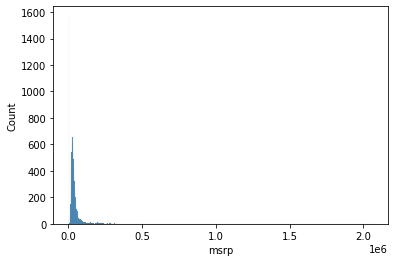

In [27]:
# Plot the histogram of MSRP
sns.histplot(df.msrp)

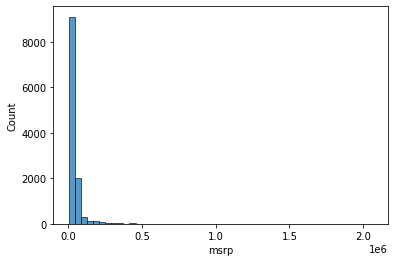

In [28]:
# Use bins with the plot to better visualize the data
sns.histplot(df.msrp, bins=50) 
# bins means how many bars we have to plot
# and is the x-axis

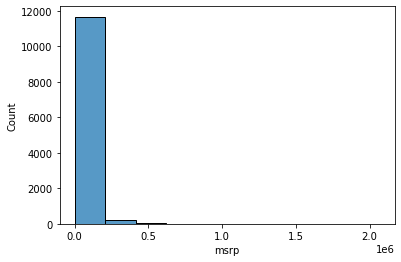

In [29]:
# if the bins are less then the bars will be a lot bigger
sns.histplot(df.msrp, bins=10) 

In [30]:
# 1e6 means 1,000,000 or one million and is the same as 10^6 (10 with the power of 6 or 6 zeros)
# in this case the price is 2 millions
# from this data plot we can see there are a lot of cars are pretty cheap
# and then a few cars are super expensive

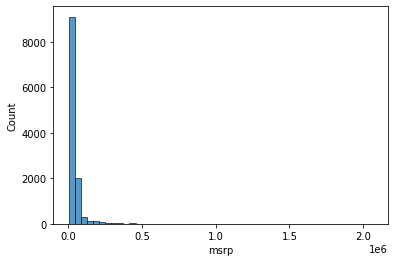

In [31]:
sns.histplot(df.msrp, bins=50)

In [32]:
# the plot above are called long tail distribution
# and this type of distribution is not good for machine learning
# the long tail it will confuse the model

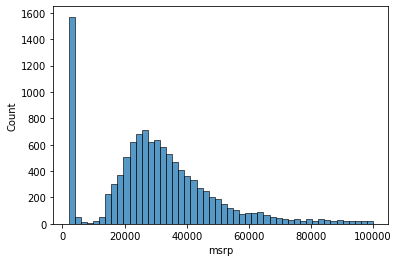

In [33]:
# Zoom the plot for better visualization of the data
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [34]:
# we need to get rid of this long tail and for that
# we apply the logarithmic distribution to the price
# and we get more compact values
# very importantt we cannot have logarithm zero and for that we use plus one
# in case we have price equal to zero
# with our data all the prices are more than zero
np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [35]:
# Use the method log1p to avoid to add plus one
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [36]:
# Store all the prices using the log
prices_logs = np.log1p(df.msrp)
prices_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

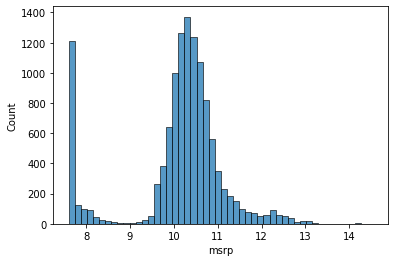

In [37]:
# Now we have small values we can plot the data
sns.histplot(prices_logs, bins=50)
# now the tail is gone

In [38]:
# now this plot is called normal distribution
# and this situation is ideal for models and they do quite well
# to predict the price

In [39]:
# after this we are going to look at the missing value
df
# and for that we are going to look at values are NAN (not a number)
# in pandas this means the value is missing or doesn't exist or wasn't recorded

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [40]:
# Find the missing values using the methods isnull and sum for totals
df.isnull().sum()
# with this data e.g. we have 3 missing values with the column 'engine_fuel_type'
# this missing values we need to keep in mind when we train our model

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

###2.4 Setting up the validation framework

In [41]:
# before train the model we need to make sure we can validate the model
# the size of the validate should be 20%

In [42]:
# Print size of the dataset
len(df)

11914

In [43]:
# Print 20% of the size of the dataset
len(df) * 0.2

2382.8

In [44]:
# Print 20% of the size of the dataset but as integer
# we don't want to have a fraction number
int(len(df) * 0.2)

2382

In [45]:
# Define the size of the dataset for validation, test and training
n       = len(df)
n_val   = int(n * 0.2)
n_test  = int(n * 0.2)
n_train = n - n_val - n_test  

In [46]:
# Print number of records for validation, test and training
n_val, n_test, n_train

(2382, 2382, 7150)

In [47]:
# now we know the size of the dataframe we need to take the parts of the dataframe
# out of this size

# Store the records for validation, test and training
df_val   = df.iloc[:n_val]
df_test  = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [48]:
df_train
# with this data we have a problem and its because is recorded by make and it means some of the brands
# e.g. ford are only in the training dataframe

# so the solution is to shuffle the data or to break it in case there's any accidental order in the data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [49]:
# The split of data should start first with the training, then validation and last test
df_train = df.iloc[n_train:]
df_val   = df.iloc[n_train:n_train+n_val]
df_test  = df.iloc[n_train+n_val:]

In [50]:
# Generate a sequence of numbers from one to n-1
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [51]:
# Shuffle the numbers generated
# Use seed method to make the results reproducible
np.random.seed(2)
np.random.shuffle(idx)

In [52]:
# Print the numbers shuffled
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [53]:
# Use the index to isolate the data for training, validation and test
df_train = df.iloc[idx[:n_train]]
df_val   = df.iloc[idx[n_train: n_train + n_val]]
df_test  = df.iloc[idx[n_train + n_val:]]

In [54]:
# Test the dataframe is suffled by print the first 10 records
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [55]:
# Print the dataframe for the training 
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [56]:
# Check the length of the datasets created
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [57]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [58]:
# Reset the index of the training dataset
df_train = df_train.reset_index(drop=True)
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [59]:
# Reset the index of the validation dataset
df_val = df_val.reset_index(drop=True)
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [60]:
# Reset the index of the test dataset
df_test = df_test.reset_index(drop=True)
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [61]:
# next we neeed to do some transformation with the Y

# Apply the log transformation with the training dataset
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [62]:
# Instead of keeping the series let's get the values for each datasets
y_train = np.log1p(df_train.msrp.values)
y_val   = np.log1p(df_val.msrp.values)
y_test  = np.log1p(df_test.msrp.values)

In [63]:
# last step we need to remove the MSRP variable from our dataframes
# we need to delete because we might accidentally use it and we need to avoid
# and to make sure that we don't use it for training purposes

# Delete the serie MSRP from the datasets: training, validation and test
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [64]:
# Check the length of the Y training dataset
len(y_train)

7150

###2.5 Linear regression

In [65]:
# linear regression is a model that is used for solving regression problems
# we use for predicting numbers, so the output of the model is a number

In [66]:
# Print the record 10 of the training dataset
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [67]:
# Create feature vector xi with data from the training dataset
xi = [453, 11, 86]

In [68]:
# Create function g that takes xi as argument
def g(xi):
  # do something ... here will be the linear regression
  return 10_000

In [69]:
# Call function g
g(xi)

10000

In [70]:
# Declare the bias term variable
w0 = 0

# Declare a vector for each feature
w = [1, 1, 1]

# Change the weights above with new values
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [71]:
# Create the function linear regression
def linear_regression(xi):
  # Implement the formula for linear regression
  n = len(xi)
  pred = w0 # we start from zero with the prediction

  # create a for range for n
  for j in range(n):
    pred = pred + w[j] * xi[j]

  # at the end return predictions
  return pred 

In [72]:
# Test the function linear regression
log_price = linear_regression(xi)
log_price

12.312

In [73]:
# note the price above its not the final price
# because we did the logarithm of y - 1
# now we need to undo this algorithm
# to undo the algorithm we need to do the exponent

# Convert the logorithm price to an exponent value
# the value produced its a prediction of the price
np.expm1(log_price)

222347.2221101062

###2.6 Linear regression vector form

In [74]:
# Create a function dot that does the dot product
def dot(xi, w):
  n = len(xi)
  
  res = 0.0

  for j in range(n):
    res = res + xi[j] * w[j]

  return res

In [75]:
# Simplified linear regression function
def linear_regression(xi):
  return w0 + dot(xi, w)

In [76]:
# Create a new vector with weights
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [77]:
# Final linear regression function
def linear_regression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

In [78]:
# Test the final linear regression function
# the result is the same
linear_regression(xi)

12.312

In [79]:
# Implement the matrix vector multiplication

# Create feature vector xi with data from the training dataset
xi = [453, 11, 86]

# Declare the bias term variable
w0 = 7.17

# Declare a vector for each feature
w = [0.01, 0.04, 0.002]

In [80]:
# Declare 3 features vectors with data from the training dataset
# 1     = always need to add once
# 148   = horsepowers
# 24    = miles per gallon
# 1385  = popularity
x1  = [1, 148, 24, 1385 ]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Create a list of list with the features vectors
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [81]:
# Convert the X list to numpy matrix
X = np.array(X)
X
# creates a two-dimensional array

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [82]:
# Create a new vector with weights
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [83]:
# Do the multiplication with the matrix and the vector
X.dot(w_new)

# now for each cars we have a prediction of the price for each car

array([12.38 , 13.552, 12.312])

In [84]:
# Finaly implement the linear regression function
def linear_regression(X):
  return X.dot(w_new)

In [85]:
# Test the final linear regressiob function
linear_regression(X)

# now we know how to do for multiple rows or cars at the same time

array([12.38 , 13.552, 12.312])

###2.7 Training a linear regression model

In [86]:
# Define the function training linear regression
def train_linear_regression(X, y):
  pass

In [87]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [88]:
# the X array is problematic because has more columns than rows
# and the matrix solution the inverse will not necessarily exist

# so we are going to add more data to the array X by creating a list of lists
X = [
    [148, 24, 1385 ], # note we removed the ones we will add later
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185 ],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185 ], 
    [142, 25, 431],
    [453, 31, 86],
]

# Convert the X list to numpy matrix
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [89]:
# Define the y target array
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [90]:
# Implement the the gram matrix
XTX = X.T.dot(X)
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [91]:
# Find the inverse of the matrix
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [92]:
# Check the matrix give as an identity matrix
XTX.dot(XTX_inv).round(1)

# we can see have ones on the diagonal of the matrix

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [93]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  2.26757496e-16,  6.52840056e-18],
       [-3.49924862e-18,  1.00000000e+00,  4.39258052e-18],
       [ 3.31839120e-17,  5.32582130e-16,  1.00000000e+00]])

In [94]:
# Multiply with x transpose and then multiply it with y
w = XTX_inv.dot(X.T).dot(y)
w

array([ 26.08419498, 286.12285934,   3.93813107])

In [95]:
# we need to include the bias term with array X
# the bias term gives us the baseline
# so that is how much a car should cost
# if we don't know anything about this car
# if we don't include the bias term then we don't know
# what should we base our prediction

# Add ones columnn to the array X

# Create a vector with ones to add the array X
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
# use the function column stack
# it can take two vectors and stack them together
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [97]:
# Stack two vectors of ones and one matrix
np.column_stack([ones, ones, X])

# the result is a two dimentional matrix

array([[1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [98]:
# now just stack the vector of ones with the matrix
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [99]:
# Implement the the gram matrix
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [100]:
# Find the inverse of the matrix
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [101]:
# Multiply with x transpose and then multiply it with y
w_full = XTX_inv.dot(X.T).dot(y)
w_full # means it contains all the weights

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [102]:
# now we can decompose it:
w0 = w_full[0] # this is the biased
w  = w_full[1:]
w0, w

# 25844... is the bias term
# array has w1 w2 and w3
# we can see the array has negative values
# negative values means instead of adding to the price
# for positive values means price increases

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [103]:
# now put everything in a function

# Define the function training linear regression
def train_linear_regression(X, y):

  # Create a vector with ones to add the array X
  ones = np.ones(X.shape[0])

  # Stack the vector of ones with the matrix
  X = np.column_stack([ones, X])

  # Implement the the gram matrix
  XTX = X.T.dot(X)

  # Find the inverse of the matrix
  XTX_inv = np.linalg.inv(XTX)

  # Multiply with x transpose and then multiply it with y
  w_full = XTX_inv.dot(X.T).dot(y)

  # return the result: first element of the tuple is the bias term
  # the rest is the weights
  return w_full[0], w_full[1:]

In [104]:
# do it now without the ones
X = np.array(X)
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [105]:
# the X array is problematic because has more columns than rows
# and the matrix solution the inverse will not necessarily exist

# so we are going to add more data to the array X by creating a list of lists
X = [
    [148, 24, 1385 ], # note we removed the ones we will add later
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185 ],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185 ], 
    [142, 25, 431],
    [453, 31, 86],
]

# Convert the X list to numpy matrix
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [106]:
# Test the function training linear regression
train_linear_regression(X, y)

# to run this code run before find this: 
# Convert the X list to numpy matrix
# X = np.array(X)
# X

# after running the code we have the same results

# after this function we are going to use this for
# our problem or for predicting the price of the car

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

###2.8 Car price baseline model

In [107]:
# Print the training dataframe
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [108]:
# Extract all the numerical columns from the training dataframe
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [109]:
# Print all the column names of the training dataframe
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [110]:
# Create base list with 5 numerical columns
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [111]:
# Get a sub-set of columns from the training dataframe
# base means basic features
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [112]:
# Extract values from the base list created and store it
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [113]:
# Print the y values of the training dataframe
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [114]:
# now we want to train a model so we use the function train linear regression
train_linear_regression(X_train, y_train)

# we have a problem here, we have this NANs
# the reason we have this is because we have missing values


(nan, array([nan, nan, nan, nan, nan]))

In [115]:
# Check the missing values of the training datafrane
df_train[base].isnull().sum()

# missing values are the engine_hp and engine_cylinders

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [116]:
# so we need to do something with the missing values
# the easy way is to fill them with zero

# Fill the missing values in the training dataframe with zeros
df_train[base].fillna(0)

# filling missing values with zero it will make the model ignore these features

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [117]:
# Check we have missing values in the training dataframe
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [118]:
# Fill the missing values in the training dataframe with zeros
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [119]:
# Call the function train linear regression after replaced the missing values
train_linear_regression(X_train, y_train)

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [120]:
# Store the result of the function train linear regression with our bias term
w0, w = train_linear_regression(X_train, y_train)

In [121]:
# now we can use these weights to make predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

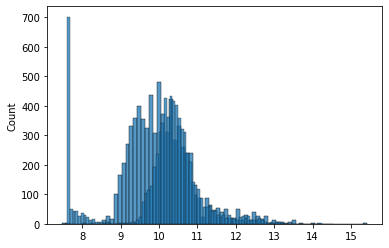

In [122]:
# Plot the predictions to see if they look similar to the original 
# to the target variable that we want to predict

# Plot the predictions and the training dataframe
sns.histplot(y_pred)
sns.histplot(y_train)

# we can observe that they have the same colors 
# so we need to change it a little bit the color

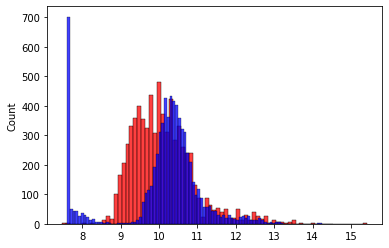

In [123]:
# Plot the predictions and the training dataframe now with colors
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color='blue')

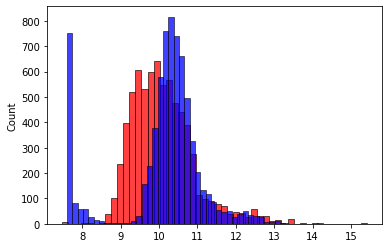

In [124]:
# Plot the predictions and the training dataframe with colors and less bins
# for better visualitation of the data ploted
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', bins=50)

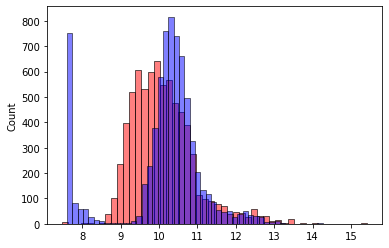

In [125]:
# Plot the predictions and the training dataframe with colors, less bins and a bit transparent
# for better visualitation of the data ploted
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# from this plot we see that the shape of prediction (red bars) is predict a smaller value compare
# with the target values, just looking for this chart we can see our model might not be ideal
# we need to have an objective way to saying that is this module good or not good 
# and when we start improving our model we want to make sure that we indeed improve our model
# and not just by looking at the charts and for that in the next we will use the RMSE 
# that means Root Mean Square Error and this is a way to objectively evaluate the performance
# of the regression models

###2.9 RMSE

In [126]:
# Define a function for RMSE using the y values and y prediction
def rmse(y, y_pred):

  # Store the error the difference between y and y prediction
  error = y - y_pred 

  # Squared error value
  se = error ** 2

  # Store the mean (average) square error
  mse = se.mean()

  # Return the square root of mean square error
  return np.sqrt(mse)

In [127]:
# Call the function RMSE
rmse(y_train, y_pred)

0.7554192603920132

###2.10 Validating the model

In [128]:
# Create base list with 5 numerical columns
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [129]:
# Fill the missing values in the training dataframe with zeros
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [130]:
# Store the result of the function train linear regression with our bias term
w0, w = train_linear_regression(X_train, y_train)

In [131]:
# now we can use these weights to make predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

In [1]:
# Create function prepare X
def prepare_X(df):
  
  # from this line of code: X_train = df_train[base].fillna(0).values
  # we are going to decompose it into multiple lines of code
  # so from one line now we have five lines

  # first step we create a dataframe with numbers
  df_num = df[base]

  # Second step we filling the missing values
  df_num = df_num.fillna(0)

  # Last step we extracting the feature matrix, the numpy array
  X = df_num.values

  # Return the numpy array X
  return X

In [135]:
# Part 1 - Training: prepare the training dataset

# Use the function prepare X with the training dataframe
X_train = prepare_X(df_train)

# Store the result of the function train linear regression with our bias term
w0, w = train_linear_regression(X_train, y_train)

# And then let's train the model again
# we prepare the matrix and we train the model then we again
# prepare the matrix and this time we prepare our validation data
# so we use the same function except that instead of using the train
# dataset we use the validation dataset and then finaly we do predictions

# Part 2 - Validation: prepare the validation dataset 

# Use the function prepare X with the validation dataframe
X_val = prepare_X(df_val)

# do the predictions so we apply the linear regression
# the weigths we have but instead of applying them to the training data set
# we apply to the feature matrix from the validation dataset

# Create y prediction using linear regression
y_pred = w0 + X_val.dot(w)

# Use RMSE with the prediction and validation
rmse(y_val, y_pred)

# note the values below its pretty similar to what we had
# with rmse(y_train, y_pred)
# output: 0.7554192...

# now we have a way of evaluating the quality of our model using RMSE
# and we can do this on the validation dataset and now we can work on improving the model

0.761653099130156

###2.11 Simple feature engineering

In [139]:
# Print the training dataset
df_train

# here we can see we have year variable and its one of the most
# columns for predicting the price of the car 
# if the car is old its cheaoer and if the car is new is more expensive

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [138]:
# instead of use the year we want the age
# and for that we need to know when the data was collected
# we do: Use the function max to find the recent year with the training dataset
df_train.year.max()

2017

In [141]:
# now we want to compute how old the cars are
2017 - df_train.year

# we can see some of the cars are 9 years old some are zero years old
# so this is the age of the car and we want use this as one of the features in our model

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [142]:
# Use the function prepare X with age feature
def prepare_X(df):

  # Create the column price with dataframe
  df['age'] = 2017 - df.year

  # Create list features that contains baseline numeric features plus the age feature
  features = base + ['age']

  # Use list features to create a dataframe with numbers
  df_num = df[features]

  # Filling the missing values of the dataframe
  df_num = df_num.fillna(0)

  # Extracting the feature matrix and return the numpy array
  X = df_num.values
  return X

In [143]:
# mow use the function prepare X

# Use the function prepare X with the training dataframe
X_train = prepare_X(df_train)

In [144]:
# Check we added the new column called age to the training dataframe
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
dtype: object

In [ ]:
# we can see we modified our dataframe and this is not something we should do
# in the function prepare X. If something go wrong then cannot be undone
# so its better pratice the function does not modified the dataframe 
# for that before doing all the code inside the function, or before adding new columns
# and what we do it just take a copy and then work with the copy
# working the a copy of the dataframe the original dataframe will not change

In [145]:
# Before to the copy lets remove the age column from the dataframe
del df_train['age']

In [ ]:
# Use the function prepare X with age feature but now before we do a copy of the dataframe
def prepare_X(df):

  # Work with a copy of the dataframe
  df = df.copy()

  # Create the column price with dataframe
  df['age'] = 2017 - df.year

  # Create list features that contains baseline numeric features plus the age feature
  features = base + ['age']

  # Use list features to create a dataframe with numbers
  df_num = df[features]

  